In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
np.set_printoptions(threshold=sys.maxsize)

In [109]:
train_kaggle = '/kaggle/input/covid19-global-forecasting-week-1/train.csv'
test_kaggle = '/kaggle/input/covid19-global-forecasting-week-1/test.csv'
submit_kaggle = '/kaggle/input/covid19-global-forecasting-week-1/submission.csv'

df_train = pd.read_csv(train_kaggle)
df_test = pd.read_csv(test_kaggle)
sample = pd.read_csv(submit_kaggle)

In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17892 non-null  int64  
 1   Province/State  8190 non-null   object 
 2   Country/Region  17892 non-null  object 
 3   Lat             17892 non-null  float64
 4   Long            17892 non-null  float64
 5   Date            17892 non-null  object 
 6   ConfirmedCases  17892 non-null  float64
 7   Fatalities      17892 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [111]:
df_train.head(5)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ForecastId      12212 non-null  int64  
 1   Province/State  5590 non-null   object 
 2   Country/Region  12212 non-null  object 
 3   Lat             12212 non-null  float64
 4   Long            12212 non-null  float64
 5   Date            12212 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 572.6+ KB


In [113]:
df_test.head(5)

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [114]:
sample.head(5)

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


## EDA

## About the Data 
1. Contains Daily Reports of Number of Cases and Fatalities for countries.
2. [Missing Data]Contains some entries with Province/State Information Missing - Dropped.
3. Contains latitude and longitude for entries, Can Plot on map.
4. Date - 22nd Feb to 23nd March.
5. Country/Region - 163

In [115]:
# Dataset Dimesnions
print('Train shape', df_train.shape)
print('Test shape', df_test.shape)
# Missing/Null Values
print('\nTrain Missing\n', df_train.isnull().sum())
print('\nTest Missing\n', df_test.isnull().sum())

Train shape (17892, 8)
Test shape (12212, 6)

Train Missing
 Id                   0
Province/State    9702
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

Test Missing
 ForecastId           0
Province/State    6622
Country/Region       0
Lat                  0
Long                 0
Date                 0
dtype: int64


### Unique countries in the dataset 

In [116]:
lst = df_train['Country/Region'].unique()
print('Total_Countries\n:', len(lst))
for i in lst:
    print(i)

Total_Countries
: 163
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Finland
France
French Guiana
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Greenland
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guyana
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Malaysia
Maldives
Malta
Martinique
Mauritania
Mauritius
Mayotte
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia

### Date Range for the Dataset 

In [117]:
print(df_train['Date'].min(), ' - ', df_train['Date'].max())

2020-01-22  -  2020-03-24


### Checking Daily Worldwide Confirmed Cases and Fatalities 

In [118]:
# GroupBy syntax (columns to group by in list)[Columns to aggregate, apply function to] . aggregation functions on it 
train_cases_conf = df_train.groupby(['Date'])['ConfirmedCases'].sum()
train_cases_conf

Date
2020-01-22       539.0
2020-01-23       627.0
2020-01-24       901.0
2020-01-25      1347.0
2020-01-26      1959.0
                ...   
2020-03-20    268110.0
2020-03-21    300255.0
2020-03-22    331467.0
2020-03-23    373583.0
2020-03-24    391426.0
Name: ConfirmedCases, Length: 63, dtype: float64

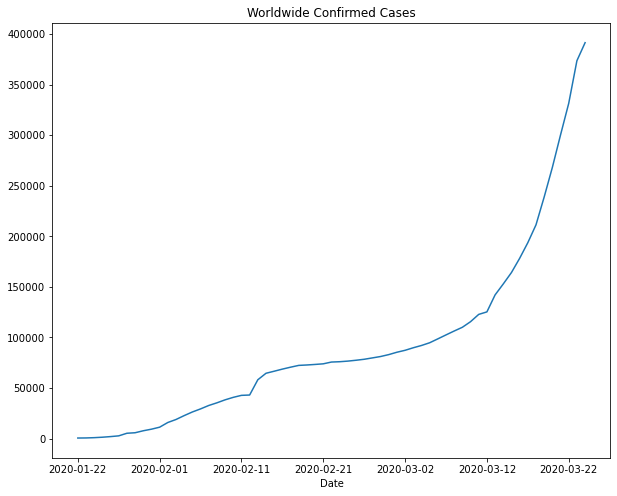

In [119]:
train_cases_conf.plot(figsize = (10,8), title = 'Worldwide Confirmed Cases')

In [120]:
train_fatal = df_train.groupby(['Date'])['Fatalities'].sum()
train_fatal

Date
2020-01-22       17.0
2020-01-23       18.0
2020-01-24       25.0
2020-01-25       41.0
2020-01-26       53.0
               ...   
2020-03-20    11249.0
2020-03-21    12920.0
2020-03-22    14578.0
2020-03-23    16439.0
2020-03-24    17459.0
Name: Fatalities, Length: 63, dtype: float64

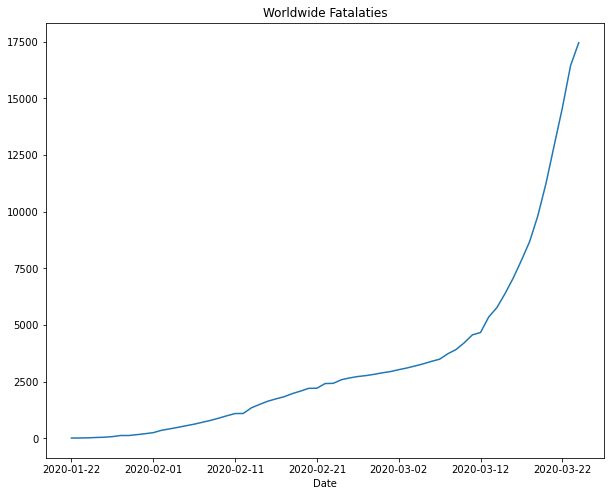

In [121]:
train_fatal.plot(figsize = (10,8), title = 'Worldwide Fatalaties')

### Check Confirmed cases and fatalities for a country 
scale = "linear", "log"

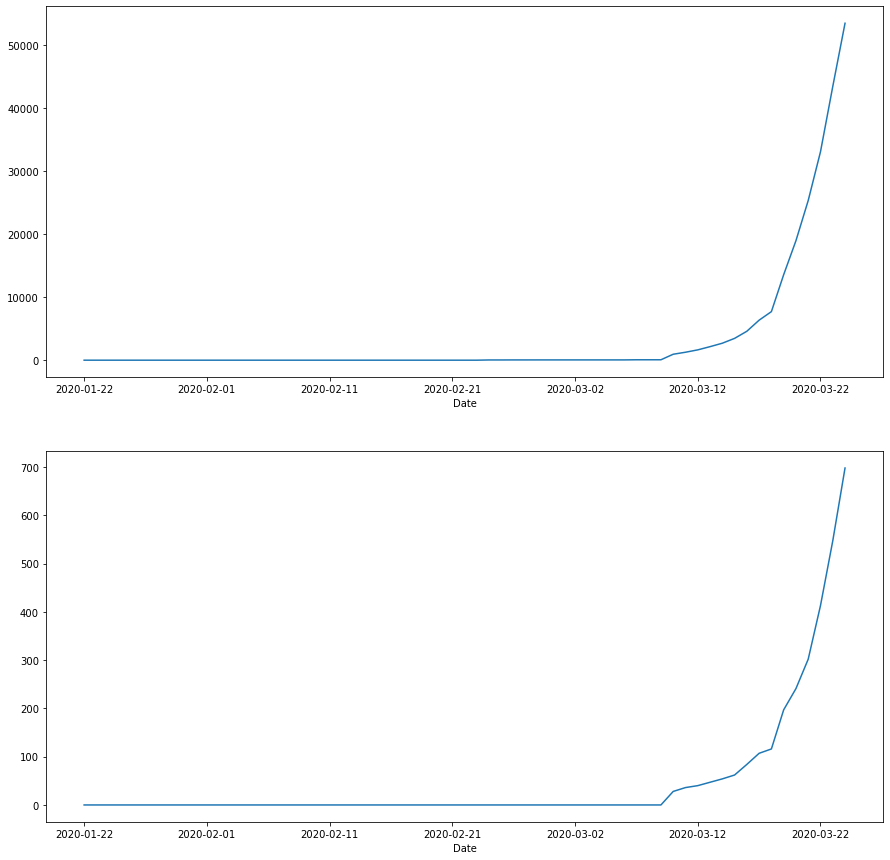

In [122]:
def country_stats(country, df):
    country_filt = (df['Country/Region'] == country)
    df_cases = df.loc[country_filt].groupby(['Date'])['ConfirmedCases'].sum()
    df_fatal = df.loc[country_filt].groupby(['Date'])['Fatalities'].sum()
    fig, axes = plt.subplots(nrows = 2, ncols= 1, figsize=(15,15))
    df_cases.plot(ax = axes[0])
    df_fatal.plot(ax = axes[1])
    
country_stats('US', df_train)

#### Fatalities and Confirmed Cases by Country (Log Scale)

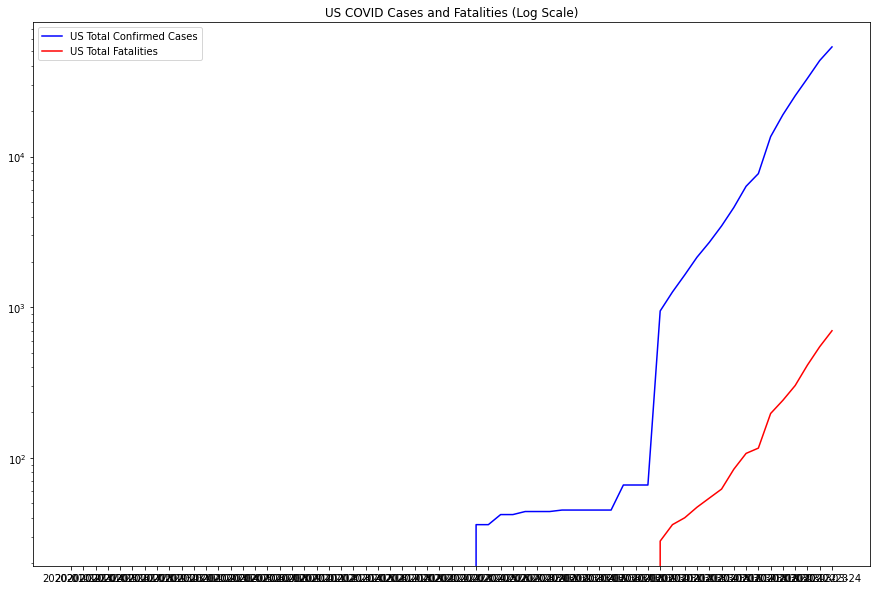

In [123]:
# grouping using same Country filter to get fatalities on each date (grouped by date)
# groupby([list of columns to groupby]) [which columns to apply aggregate fx to ]. (aggregate function)

def country_stats_log(country, df):
    count_filt =(df_train['Country/Region'] == country)
    df_count_case = df_train.loc[count_filt].groupby(['Date'])['ConfirmedCases'].sum()
    df_count_fatal = df_train.loc[count_filt].groupby(['Date'])['Fatalities'].sum()
    plt.figure(figsize=(15,10))
    plt.axes(yscale = 'log')
    plt.plot(df_count_case.index, df_count_case.tolist(), 'b', label = country +' Total Confirmed Cases')
    plt.plot(df_count_fatal.index, df_count_fatal.tolist(), 'r', label = country +' Total Fatalities')
    plt.title(country +' COVID Cases and Fatalities (Log Scale)')
    plt.legend()
    

country_stats_log('US', df_train)

###  Most Affected Countries

In [124]:
# as_index = False to not make the grouping column the index, creates a df here instead of series, preserves
# Confirmedcases column

train_case_country = df_train.groupby(['Country/Region'], as_index=False)['ConfirmedCases'].max()

# Sorting by number of cases
train_case_country.sort_values('ConfirmedCases', ascending=False, inplace = True)
train_case_country

,Country/Region,ConfirmedCases
75,Italy,69176.0
29,China,67801.0
139,Spain,39885.0
55,Germany,32986.0
154,US,25681.0
...,...,...
148,The Bahamas,0.0
62,Guernsey,0.0
60,Guam,0.0
59,Guadeloupe,0.0


<BarContainer object of 5 artists>

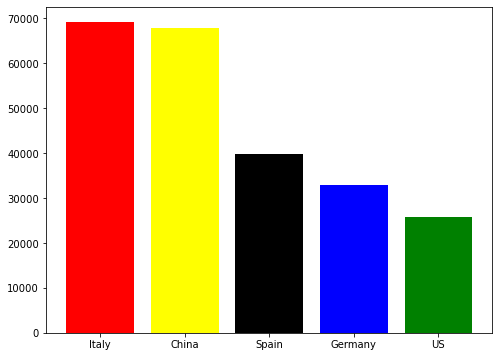

In [125]:
plt.figure(figsize=(8,6))
plt.bar(train_case_country['Country/Region'][:5], train_case_country['ConfirmedCases'][:5], color = ['red', 'yellow','black','blue','green'])

#### No. of Cases on final date(2020/03/23), (Not Increase, Cumulative)

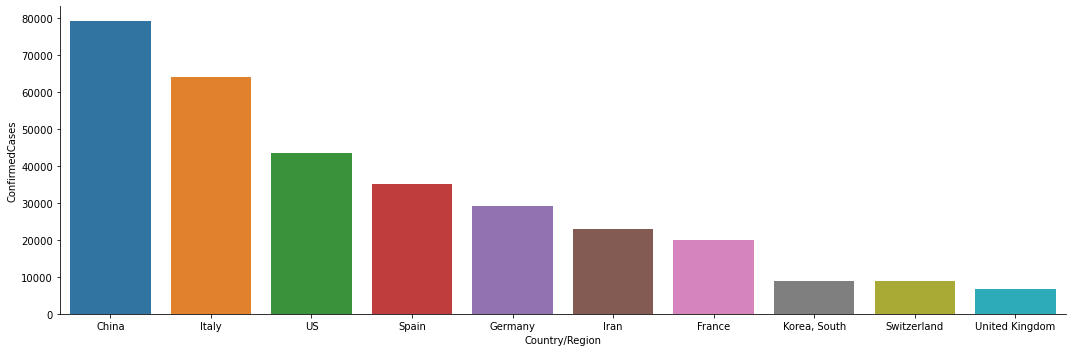

In [126]:
# Confirmed Cases till a particular day by country

def case_day_country (Date, df):
    df = df.groupby(['Country/Region', 'Date'], as_index = False)['ConfirmedCases'].sum()
    date_filter = (df['Date'] == Date)
    df = df.loc[date_filter]
    df.sort_values('ConfirmedCases', ascending = False, inplace = True)
    sns.catplot(x = 'Country/Region', y = 'ConfirmedCases' , data = df.head(10), height=5,aspect=3, kind = 'bar')
    
    
case_day_country('2020-03-23', df_train)

# Data Wrangling/ Pre-processing/ Cleaning 
1. Identifying and Handling missing values.
2. Data Formating.
3. Data Normalization(centering and scaling).
4. Data bining.
5. Turning categorical values into numerical values.

### Need to Exclude Leaky Data, the same Dates are in both train and test set.
1. First convert object to python datetime type <br>
Using pd.to_datetime() <br>
Check Getting converted to float, because haven't converted to date before comparison, still object.

In [127]:
df_train.Date = pd.to_datetime(df_train['Date'])
print(df_train['Date'].max())
print(df_test['Date'].min())

2020-03-24 00:00:00
2020-03-12


### Truncate df_train by date < df_test['Date'].min()

In [128]:
date_filter = df_train['Date'] < df_test['Date'].min()
df_train = df_train.loc[date_filter]

In [129]:
# Dropping ID and getting rid of Province/State with NULL values 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 17878
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              14200 non-null  int64         
 1   Province/State  6500 non-null   object        
 2   Country/Region  14200 non-null  object        
 3   Lat             14200 non-null  float64       
 4   Long            14200 non-null  float64       
 5   Date            14200 non-null  datetime64[ns]
 6   ConfirmedCases  14200 non-null  float64       
 7   Fatalities      14200 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 998.4+ KB


In [130]:
# lets get Cumulative sum of ConfirmedCases and Fatalities for each country on each data (same as original data)
# Doing to create copy without ID and 

train_country_date = df_train.groupby(['Country/Region', 'Date', 'Lat', 'Long'], as_index=False)['ConfirmedCases', 'Fatalities'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [131]:
print(train_country_date.info())
print(train_country_date.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 14199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  14200 non-null  object        
 1   Date            14200 non-null  datetime64[ns]
 2   Lat             14200 non-null  float64       
 3   Long            14200 non-null  float64       
 4   ConfirmedCases  14200 non-null  float64       
 5   Fatalities      14200 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 776.6+ KB
None
Country/Region    0
Date              0
Lat               0
Long              0
ConfirmedCases    0
Fatalities        0
dtype: int64


### Feature Engineering
Splitting Date into day, month, day of week. <br>
Check if Date is in python datetime format. Else, convert object to python datetime type <br>
Using pd.to_datetime()

In [132]:
train_country_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 14199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  14200 non-null  object        
 1   Date            14200 non-null  datetime64[ns]
 2   Lat             14200 non-null  float64       
 3   Long            14200 non-null  float64       
 4   ConfirmedCases  14200 non-null  float64       
 5   Fatalities      14200 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 776.6+ KB


#### Using Pandas Series.dt.month
The month as January=1, December=12.

In [133]:
# Adding day, month, day of week columns 

train_country_date['Month'] = train_country_date['Date'].dt.month
train_country_date['Day'] = train_country_date['Date'].dt.day
train_country_date['Day_Week'] = train_country_date['Date'].dt.dayofweek
train_country_date['quarter'] = train_country_date['Date'].dt.quarter
train_country_date['dayofyear'] = train_country_date['Date'].dt.dayofyear
train_country_date['weekofyear'] = train_country_date['Date'].dt.weekofyear

In [134]:
train_country_date.head()

,Country/Region,Date,Lat,Long,ConfirmedCases,Fatalities,Month,Day,Day_Week,quarter,dayofyear,weekofyear
0,Afghanistan,2020-01-22,33.0,65.0,0.0,0.0,1,22,2,1,22,4
1,Afghanistan,2020-01-23,33.0,65.0,0.0,0.0,1,23,3,1,23,4
2,Afghanistan,2020-01-24,33.0,65.0,0.0,0.0,1,24,4,1,24,4
3,Afghanistan,2020-01-25,33.0,65.0,0.0,0.0,1,25,5,1,25,4
4,Afghanistan,2020-01-26,33.0,65.0,0.0,0.0,1,26,6,1,26,4


In [135]:
train_country_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 14199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  14200 non-null  object        
 1   Date            14200 non-null  datetime64[ns]
 2   Lat             14200 non-null  float64       
 3   Long            14200 non-null  float64       
 4   ConfirmedCases  14200 non-null  float64       
 5   Fatalities      14200 non-null  float64       
 6   Month           14200 non-null  int64         
 7   Day             14200 non-null  int64         
 8   Day_Week        14200 non-null  int64         
 9   quarter         14200 non-null  int64         
 10  dayofyear       14200 non-null  int64         
 11  weekofyear      14200 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 1.4+ MB


#### Same Feature Engineering for Test Set

In [136]:
# First drop Province/State
df_test.drop('Province/State', axis = 1, inplace = True)

# Converting Date Object to Datetime type

df_test.Date = pd.to_datetime(df_test['Date'])
df_test.head(2)

,ForecastId,Country/Region,Lat,Long,Date
0,1,Afghanistan,33.0,65.0,2020-03-12
1,2,Afghanistan,33.0,65.0,2020-03-13


In [137]:
# adding Month, DAy, Day_week columns Using Pandas Series.dt.month

df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day
df_test['Day_Week'] = df_test['Date'].dt.dayofweek
df_test['quarter'] = df_test['Date'].dt.quarter
df_test['dayofyear'] = df_test['Date'].dt.dayofyear
df_test['weekofyear'] = df_test['Date'].dt.weekofyear

In [138]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ForecastId      12212 non-null  int64         
 1   Country/Region  12212 non-null  object        
 2   Lat             12212 non-null  float64       
 3   Long            12212 non-null  float64       
 4   Date            12212 non-null  datetime64[ns]
 5   Month           12212 non-null  int64         
 6   Day             12212 non-null  int64         
 7   Day_Week        12212 non-null  int64         
 8   quarter         12212 non-null  int64         
 9   dayofyear       12212 non-null  int64         
 10  weekofyear      12212 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 1.0+ MB


#### Councatenating Train-Test to Label encode Country/Region Categorical Variable.
1. Make copy of train data without Confirmed Cases and Fatalities. Index - 0 to 17608
2. Concatenate train, test.
3. Label Encode Countries.
4. Add back Cofirmed Cases, Fatalities columns to clean_train_data.
5. Modelling
6. Saving Predicted Values with ForecastID

In [139]:
# train_country_date
# df_test
# Lets select the Common Labels and concatenate.

labels = ['Country/Region', 'Lat', 'Long', 'Date', 'Month', 'Day', 'Day_Week','quarter', 'dayofyear', 'weekofyear']

df_train_clean = train_country_date[labels]
df_test_clean = df_test[labels]

data_clean = pd.concat([df_train_clean, df_test_clean], axis = 0)

In [140]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26412 entries, 0 to 12211
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  26412 non-null  object        
 1   Lat             26412 non-null  float64       
 2   Long            26412 non-null  float64       
 3   Date            26412 non-null  datetime64[ns]
 4   Month           26412 non-null  int64         
 5   Day             26412 non-null  int64         
 6   Day_Week        26412 non-null  int64         
 7   quarter         26412 non-null  int64         
 8   dayofyear       26412 non-null  int64         
 9   weekofyear      26412 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 2.2+ MB


## Preparing Data For Models - LabelEncode Country

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
# Label Encoder for Countries 

enc = LabelEncoder()
data_clean['Country'] = enc.fit_transform(data_clean['Country/Region'])
data_clean

,Country/Region,Lat,Long,Date,Month,Day,Day_Week,quarter,dayofyear,weekofyear,Country
0,Afghanistan,33.0000,65.0000,2020-01-22,1,22,2,1,22,4,0
1,Afghanistan,33.0000,65.0000,2020-01-23,1,23,3,1,23,4,0
2,Afghanistan,33.0000,65.0000,2020-01-24,1,24,4,1,24,4,0
3,Afghanistan,33.0000,65.0000,2020-01-25,1,25,5,1,25,4,0
4,Afghanistan,33.0000,65.0000,2020-01-26,1,26,6,1,26,4,0
...,...,...,...,...,...,...,...,...,...,...,...
12207,Zambia,-15.4167,28.2833,2020-04-19,4,19,6,2,110,16,162
12208,Zambia,-15.4167,28.2833,2020-04-20,4,20,0,2,111,17,162
12209,Zambia,-15.4167,28.2833,2020-04-21,4,21,1,2,112,17,162
12210,Zambia,-15.4167,28.2833,2020-04-22,4,22,2,2,113,17,162


In [143]:
# Dropping Country/Region and Date

data_clean.drop(['Country/Region', 'Date'], axis = 1, inplace=True)

### Splitting Back into Train and Test

In [144]:
index_split = df_train.shape[0]
data_train_clean = data_clean[:index_split]

In [145]:
data_test_clean = data_clean[index_split:]

### Adding Back Confirmed Cases and Fatalities
Using original df_train, check shape is same, head, tail have same values. ORDER NEEDS TO BE SAME.

In [146]:
data_train_clean.tail(5)

,Lat,Long,Month,Day,Day_Week,quarter,dayofyear,weekofyear,Country
14195,-15.4167,28.2833,3,7,5,1,67,10,162
14196,-15.4167,28.2833,3,8,6,1,68,10,162
14197,-15.4167,28.2833,3,9,0,1,69,11,162
14198,-15.4167,28.2833,3,10,1,1,70,11,162
14199,-15.4167,28.2833,3,11,2,1,71,11,162


### Creating Features and Two Labels

In [147]:
x = data_train_clean[['Lat', 'Long', 'Month', 'Day', 'Day_Week','quarter', 'dayofyear', 'weekofyear', 'Country']]
y_case = df_train['ConfirmedCases']
y_fatal = df_train['Fatalities']

### Train-Test Split - Confirmed Cases

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_case, test_size = 0.3, random_state = 42)

### Train-Test Split - Fatalities

In [149]:
from sklearn.model_selection import train_test_split

x_train_fatal, x_test_fatal, y_train_fatal, y_test_fatal = train_test_split(x, y_fatal, test_size = 0.3, random_state = 42)

## Modeling - Regression Problem 
Using features Country/Region, Lat, Long, Month, Day, Day_week, quarter, dayofyear, weekofyear.<br>
To predict ConfirmedCases, Fatalities.
### To predict 2 Different Target Variables, Train two classifiers, one for each.

# Modelling

## RandomForest Regressor

In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### For ConfirmedCases

In [151]:
rf = RandomForestRegressor(n_estimators =100)
rf.fit(x_train, y_train.values.ravel())

RandomForestRegressor()

In [152]:
rf.score(x_train, y_train)

0.948585401014438

In [153]:
rf.score(x_test, y_test)

0.7577801645853052

In [154]:
# Predicted Values and MSE
y_pred_train = rf.predict(x_train)
print(mean_squared_error(y_train, y_pred_train))

385102.170034487


In [155]:
# Training on entire set and predict values.

rf.fit(x, y_case.values.ravel())

RandomForestRegressor()

In [156]:
# Predicted ConfirmedCases
rf_pred_case = rf.predict(data_test_clean)

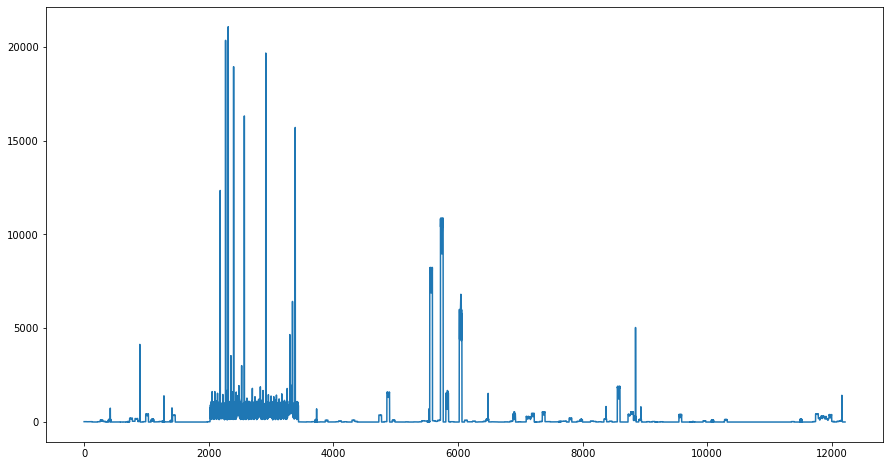

In [157]:
plt.figure(figsize=(15,8))
plt.plot(rf_pred_case)

#### For Fatalities

In [158]:
rf.fit(x, y_fatal.values.ravel())

RandomForestRegressor()

In [159]:
rf_pred_fatal = rf.predict(data_test_clean)

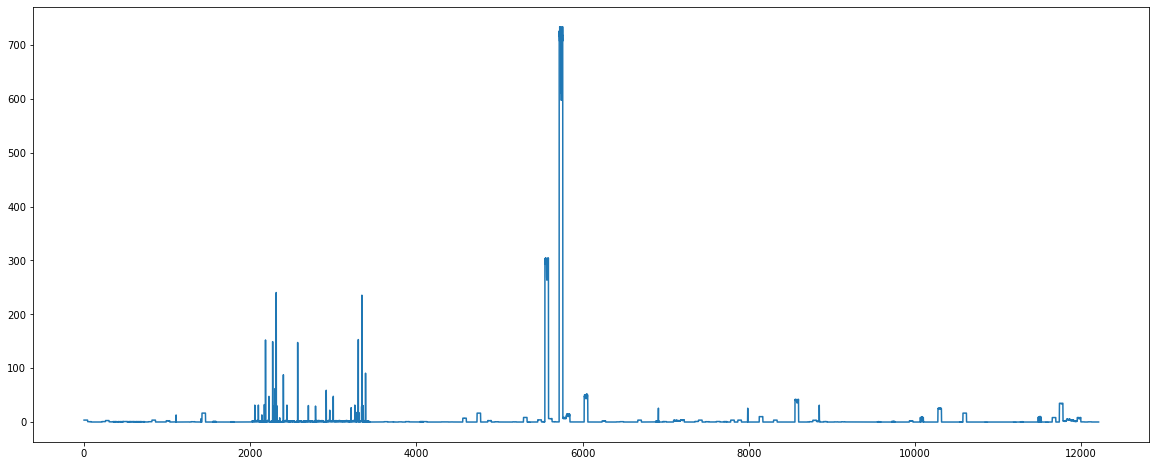

In [160]:
plt.figure(figsize=(20,8))
plt.plot(rf_pred_fatal)

In [161]:
# Saving to Submission.csv

submission = pd.read_csv(submit_kaggle)
submission['ConfirmedCases'] = rf_pred_case
submission['Fatalities'] = rf_pred_fatal

submission.to_csv('submission.csv', index = False)